<a href="https://colab.research.google.com/github/ProvenDruid/ANN/blob/main/ANN_depthvsthickness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from matplotlib_inline.backend_inline import set_matplotlib_formats

In [ ]:
#import and organize the data
import pandas as pd
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

# convert from pandas dataframe to tensor
data = torch.tensor( iris[iris.columns[0:4]].values ).float()

# transform species to number
labels = torch.zeros(len(data), dtype=torch.long)
# labels[iris.species=='setosa'] = 0 # don't need!
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

In [ ]:
# create a class for the model

class ANNiris(nn.Module):
  def __init__(self,nUnits,nLayers):
    super().__init__()

    # create dictionary to store the layers
    self.layers = nn.ModuleDict()
    self.nLayers = nLayers#

    ### input layer
    self.layers['input'] = nn.Linear(4,nUnits)

    ### hidden layers
    for i in range(nLayers):
      self.layers[f'hidden{i}'] = nn.Linear(nUnits,nUnits)

    ### output layer
    self.layers['output'] = nn.Linear(nUnits,3)


  # forward pass
  def forward(self,x):
    # input layer (note: the code in the video omits the relu after this layer)
    x = F.relu( self.layers['input'](x) )

    # hidden layers
    for i in range(self.nLayers):
      x = F.relu( self.layers[f'hidden{i}'](x) )

    # return output layer
    x = self.layers['output'](x)
    return x

In [ ]:
# generate an instance of the model and inspect it
nUnitsPerLayer = 12
nLayers = 4
net = ANNiris(nUnitsPerLayer,nLayers)
net

ANNiris(
  (layers): ModuleDict(
    (input): Linear(in_features=4, out_features=12, bias=True)
    (hidden0): Linear(in_features=12, out_features=12, bias=True)
    (hidden1): Linear(in_features=12, out_features=12, bias=True)
    (hidden2): Linear(in_features=12, out_features=12, bias=True)
    (hidden3): Linear(in_features=12, out_features=12, bias=True)
    (output): Linear(in_features=12, out_features=3, bias=True)
  )
)

In [ ]:
# A quick test of running some numbers through the model.
# This simply ensures that the architecture is internally consistent.


# 10 samples, 4 dimensions
tmpx = torch.randn(10,4)

# run it through the DL
y = net(tmpx)

# exam the shape of the output
print( y.shape ), print(' ')

# and the output itself
print(y)

torch.Size([10, 3])
 
tensor([[0.0403, 0.3082, 0.1485],
        [0.0305, 0.3108, 0.1495],
        [0.0316, 0.3115, 0.1526],
        [0.0318, 0.3105, 0.1485],
        [0.0326, 0.3079, 0.1502],
        [0.0427, 0.3066, 0.1431],
        [0.0309, 0.3104, 0.1490],
        [0.0317, 0.3108, 0.1480],
        [0.0318, 0.3108, 0.1515],
        [0.0349, 0.3120, 0.1521]], grad_fn=<AddmmBackward0>)


In [ ]:
# a function to train the model

def trainTheModel(theModel):

  # define the loss function and optimizer
  lossfun = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(theModel.parameters(),lr=.01)

  # loop over epochs
  for epochi in range(numepochs):

    # forward pass
    yHat = theModel(data)

    # compute loss
    loss = lossfun(yHat,labels)

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



  # final forward pass to get accuracy
  predictions = theModel(data)
  predlabels = torch.argmax(predictions,axis=1)
  acc = 100*torch.mean((predlabels == labels).float())

  # total number of trainable parameters in the model
  nParams = sum(p.numel() for p in theModel.parameters() if p.requires_grad)

  # function outputs
  return acc,nParams

In [ ]:
# test the function once

numepochs = 2500
acc = trainTheModel(net)

# check the outputs
acc # tuple containing (accuracy,nparams)

(tensor(98.), 723)

In [ ]:
# this cell takes ~2 mins

# define the model parameters
numlayers = range(1,6)         # number of hidden layers
numunits  = np.arange(4,101,3) # units per hidden layer

# initialize output matrices
accuracies  = np.zeros((len(numunits),len(numlayers)))
totalparams = np.zeros((len(numunits),len(numlayers)))

# number of training epochs
numepochs = 500


# start the experiment!
for unitidx in range(len(numunits)):
  for layeridx in range(len(numlayers)):

    # create a fresh model instance
    net = ANNiris(numunits[unitidx],numlayers[layeridx])

    # run the model and store the results
    acc,nParams = trainTheModel(net)
    accuracies[unitidx,layeridx] = acc

    # store the total number of parameters in the model
    totalparams[unitidx,layeridx] = nParams


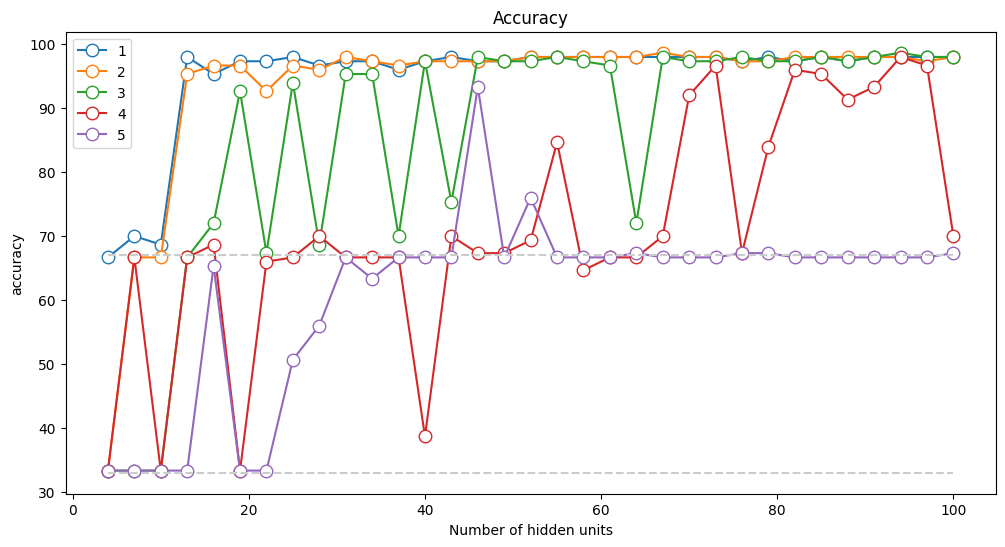

In [ ]:
# show accuracy as a function of model depth
fig,ax = plt.subplots(1,figsize=(12,6))

ax.plot(numunits,accuracies,'o-',markerfacecolor='w',markersize=9)
ax.plot(numunits[[0,-1]],[33,33],'--',color=[.8,.8,.8])
ax.plot(numunits[[0,-1]],[67,67],'--',color=[.8,.8,.8])
ax.legend(numlayers)
ax.set_ylabel('accuracy')
ax.set_xlabel('Number of hidden units')
ax.set_title('Accuracy')
plt.show()

In [ ]:
np.arange(4,101,3)

array([  4,   7,  10,  13,  16,  19,  22,  25,  28,  31,  34,  37,  40,
        43,  46,  49,  52,  55,  58,  61,  64,  67,  70,  73,  76,  79,
        82,  85,  88,  91,  94,  97, 100])

In [ ]:
np.linspace(4,101,3)

array([  4. ,  52.5, 101. ])